## Handling Missing Values

In [1]:
import pandas as pd
import os

In [2]:
data = pd.read_csv('C:\\Users\\yanvi\\OneDrive\\Documents\\Train.csv')

In [3]:
print(data.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [4]:
missing_values = data.isnull().sum()


## Calculates the total number of missing values for each column in the dataset.


In [5]:
print("Missing values per column:")
print(missing_values)

Missing values per column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [6]:
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('median'))


In [7]:
mode_outlet_size = data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
data['Outlet_Size'] = data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(mode_outlet_size[x.name]))


- **First line**: Finds the most common `Outlet_Size` for each `Outlet_Type`.
- **Second line**: Fills missing `Outlet_Size` values with the calculated mode.

It's filling missing sizes based on type.


In [8]:
# Check for missing values again
print(data.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn: A Data Visualization Library

- **Purpose**: Seaborn is used for **statistical data visualization**.
- **Key Features**:
  - **Built on Matplotlib**: Provides a high-level interface for drawing attractive graphics.
  - **Easy to Use**: Simplifies the creation of complex visualizations.
  - **Data Handling**: Works well with pandas DataFrames.
  - **Statistical Functions**: Integrates with statistical functions for better insights.

## Common Uses
- **Heatmaps**
- **Boxplots**
- **Pairplots**


Text(0.5, 1.0, 'Before Imputation')

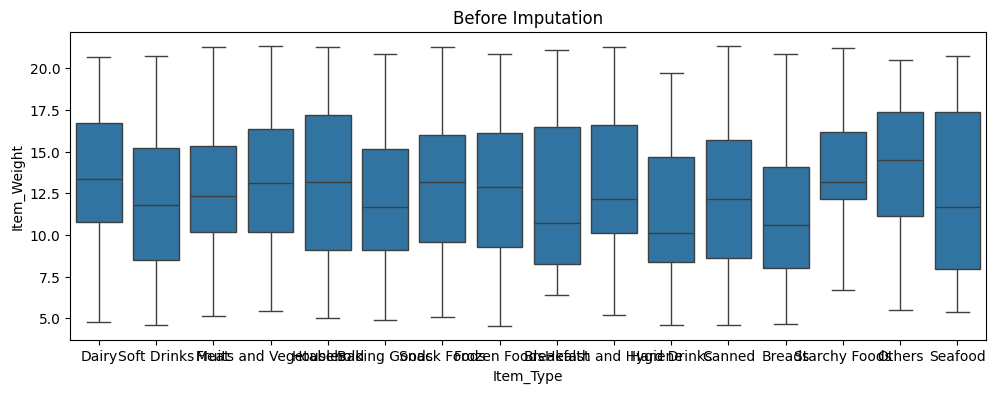

In [10]:
plt.figure(figsize=(26, 4))

# Before Imputation
plt.subplot(1, 2, 1)
sns.boxplot(x='Item_Type', y='Item_Weight', data=data[data['Item_Weight'].notnull()])
plt.title('Before Imputation')

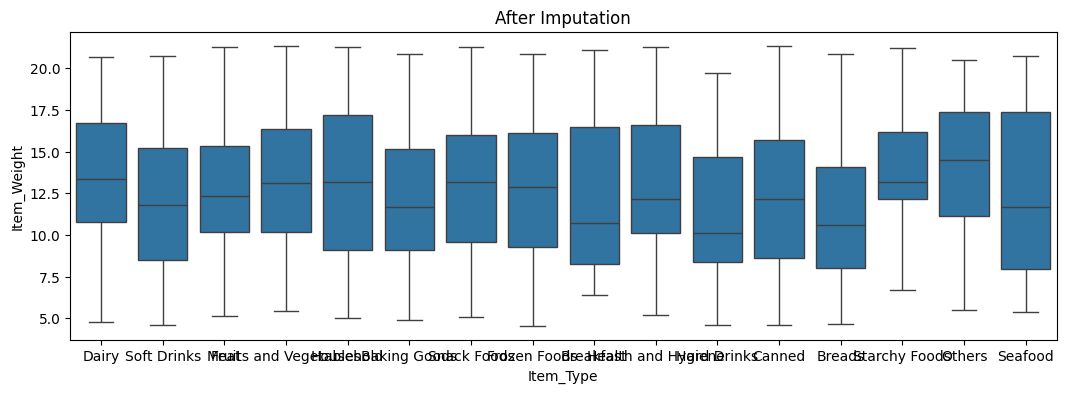

In [11]:
plt.figure(figsize=(28, 4))
plt.subplot(1, 2, 2)
sns.boxplot(x='Item_Type', y='Item_Weight', data=data)
plt.title('After Imputation')

plt.show()

## Data Visualization

## Need for Data Visualization

Data visualization is essential for several reasons:

- **Simplifies Complex Data**: It transforms complex datasets into visual representations, making them easier to understand.
- **Identifies Patterns and Trends**: Visuals help in spotting trends, patterns, and anomalies that might not be apparent in raw data.
- **Facilitates Decision Making**: It aids stakeholders in making informed decisions quickly by presenting data in a clear and actionable format.
- **Enhances Communication**: Visualizations effectively communicate findings and insights to diverse audiences, regardless of their data literacy.
- **Supports Data Exploration**: It allows users to explore data interactively, leading to deeper insights and understanding.


In [12]:
top_performers = data.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index()

C:\Users\yanvi\AppData\Local\Temp\ipykernel_7320\3552522702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette='Set2')


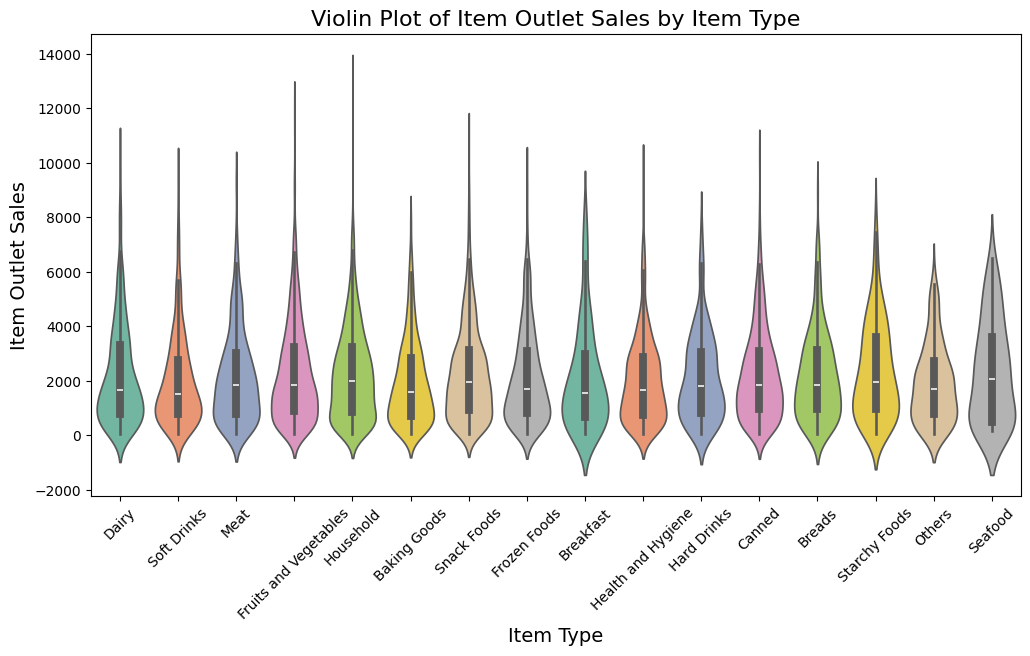

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.title('Violin Plot of Item Outlet Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.show()


The outlet with the highest sales in the dataset is **Fruits and Vegetables**.


In [14]:
top_performers = top_performers.sort_values(by='Item_Outlet_Sales', ascending=False)

In [15]:
print(top_performers)

                Item_Type  Item_Outlet_Sales
6   Fruits and Vegetables       2.820060e+06
13            Snack Foods       2.732786e+06
9               Household       2.055494e+06
5            Frozen Foods       1.825735e+06
4                   Dairy       1.522594e+06
3                  Canned       1.444151e+06
0            Baking Goods       1.265525e+06
8      Health and Hygiene       1.045200e+06
10                   Meat       9.175656e+05
14            Soft Drinks       8.928977e+05
1                  Breads       5.532372e+05
7             Hard Drinks       4.577934e+05
15          Starchy Foods       3.514013e+05
11                 Others       3.255176e+05
2               Breakfast       2.322990e+05
12                Seafood       1.488682e+05


In [16]:
top_n = top_performers.head(5)  # Change the number to however many top performers you want
print(top_n)

                Item_Type  Item_Outlet_Sales
6   Fruits and Vegetables       2.820060e+06
13            Snack Foods       2.732786e+06
9               Household       2.055494e+06
5            Frozen Foods       1.825735e+06
4                   Dairy       1.522594e+06


## Bar Chart

C:\Users\yanvi\AppData\Local\Temp\ipykernel_7320\2914687619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=top_performers, palette='viridis')


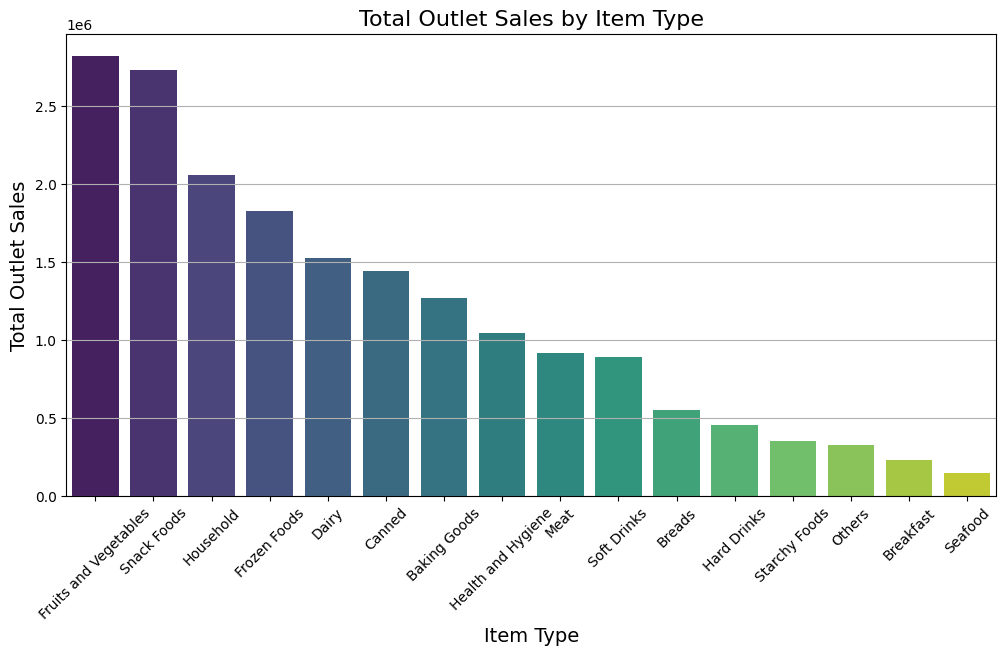

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=top_performers, palette='viridis')
plt.title('Total Outlet Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Total Outlet Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid only on the y-axis for better readability
plt.show()


In [18]:
sales_by_year = data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

In [19]:
sales_by_year = sales_by_year.sort_values(by='Outlet_Establishment_Year')
print(sales_by_year)

   Outlet_Establishment_Year  Item_Outlet_Sales
0                       1985       3.633620e+06
1                       1987       2.142664e+06
2                       1997       2.118395e+06
3                       1998       1.883402e+05
4                       1999       2.183970e+06
5                       2002       2.036725e+06
6                       2004       2.268123e+06
7                       2007       2.167465e+06
8                       2009       1.851823e+06


## Line Chart

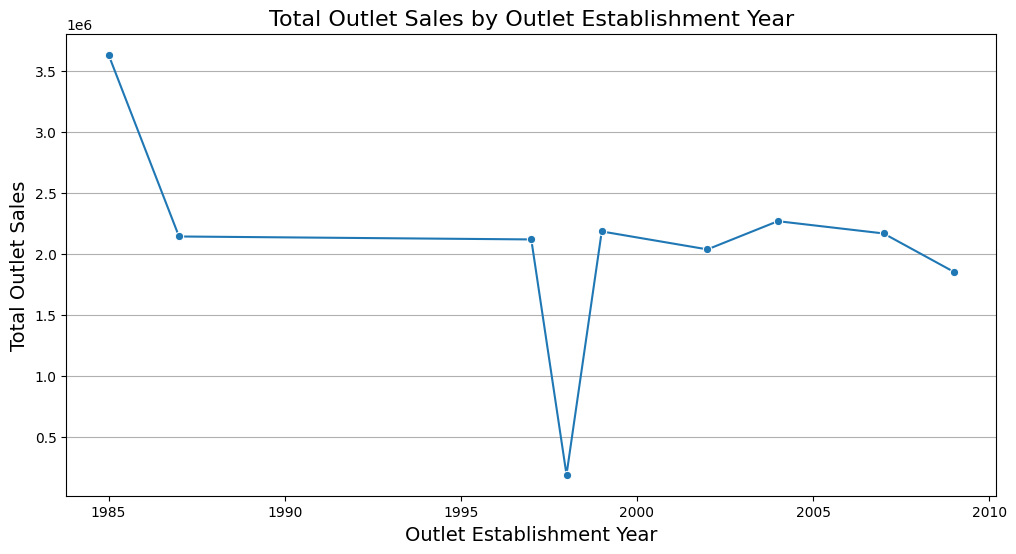

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=sales_by_year, marker='o')
plt.title('Total Outlet Sales by Outlet Establishment Year', fontsize=16)
plt.xlabel('Outlet Establishment Year', fontsize=14)
plt.ylabel('Total Outlet Sales', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add grid only on the y-axis for better readability
plt.show()

The year **1985** has the highest sales in the dataset.


C:\Users\yanvi\AppData\Local\Temp\ipykernel_7320\2659839727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette='viridis')


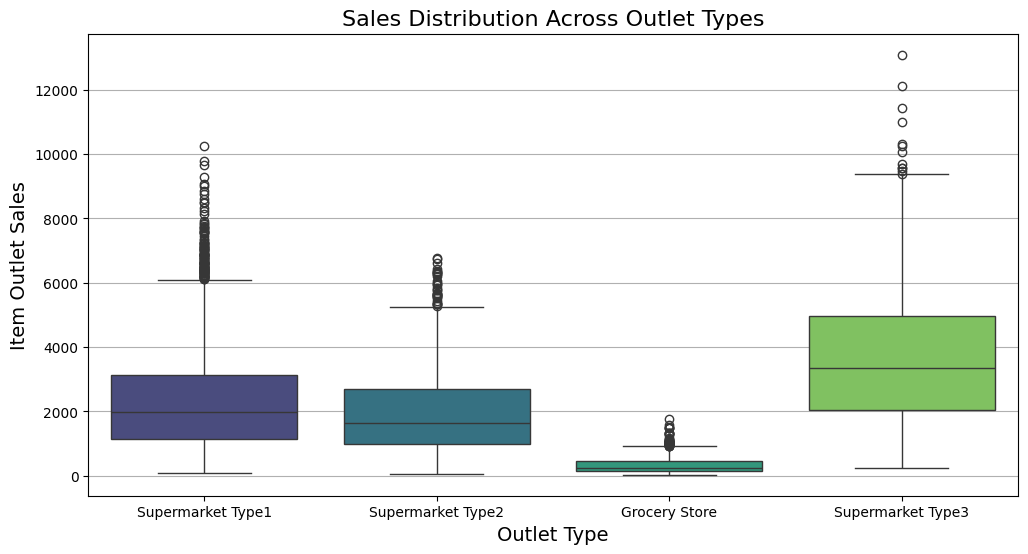

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette='viridis')
plt.title('Sales Distribution Across Outlet Types', fontsize=16)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add grid only on the y-axis for better readability
plt.show()

## Boxplot Description

A **boxplot** (or whisker plot) is a graphical representation that summarizes the distribution of a dataset. It displays:

- **Median**: The line inside the box represents the median value.
- **Interquartile Range (IQR)**: The box shows the middle 50% of the data, spanning from the first quartile (Q1) to the third quartile (Q3).
- **Whiskers**: Lines extending from the box indicate the range of the data, typically covering 1.5 times the IQR.
- **Outliers**: Individual points outside the whiskers represent outliers in the dataset.

Boxplots are useful for comparing distributions across different groups and identifying outliers.


In [22]:
sales_summary = data.groupby('Outlet_Type')['Item_Outlet_Sales'].describe()
print(sales_summary)

                    count         mean          std       min         25%  \
Outlet_Type                                                                 
Grocery Store      1083.0   339.828500   260.851582   33.2900   153.79980   
Supermarket Type1  5577.0  2316.181148  1515.965558   73.2380  1151.16820   
Supermarket Type2   928.0  1995.498739  1375.932889   69.2432   981.55565   
Supermarket Type3   935.0  3694.038558  2127.760054  241.6854  2044.33890   

                         50%         75%         max  
Outlet_Type                                           
Grocery Store       256.9988   458.73620   1775.6886  
Supermarket Type1  1990.7420  3135.91800  10256.6490  
Supermarket Type2  1655.1788  2702.64865   6768.5228  
Supermarket Type3  3364.9532  4975.52340  13086.9648  


In [23]:
average_sales_by_size = data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index()

C:\Users\yanvi\AppData\Local\Temp\ipykernel_7320\2711121451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=average_sales_by_size, palette='viridis')


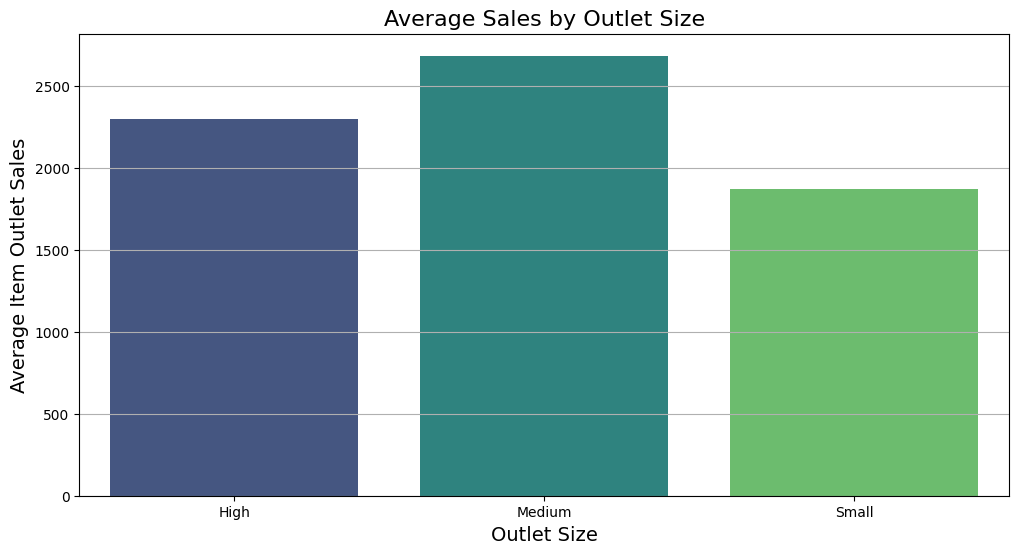

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=average_sales_by_size, palette='viridis')
plt.title('Average Sales by Outlet Size', fontsize=16)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Average Item Outlet Sales', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add grid only on the y-axis for better readability
plt.show()

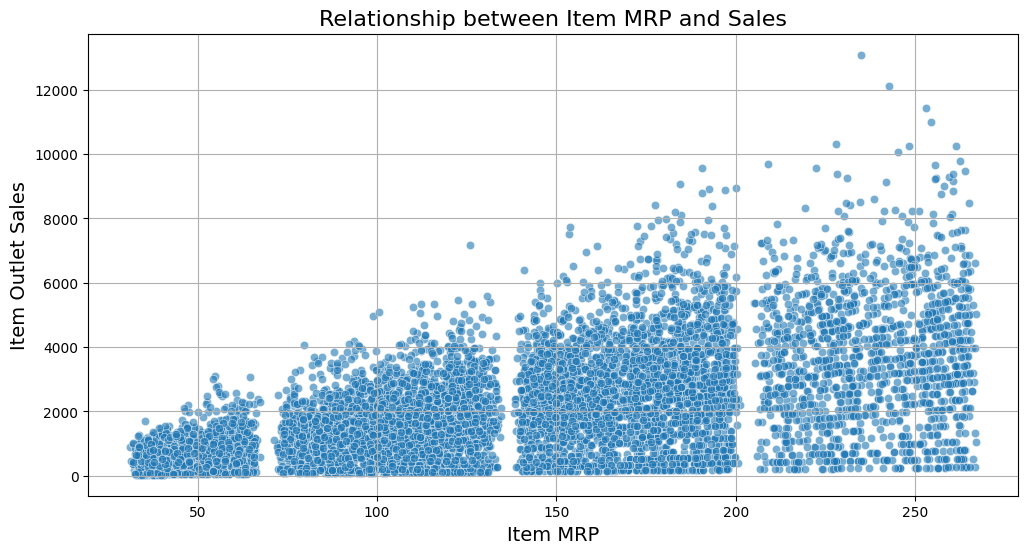

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data, alpha=0.6, marker='o')
plt.title('Relationship between Item MRP and Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.grid()  # Add a grid for better readability
plt.show()

## Scatter Plot Description

A **scatter plot** is a type of data visualization that uses dots to represent values for two different variables. It displays:

- **Individual Data Points**: Each point on the plot corresponds to an observation in the dataset, with one variable plotted on the x-axis and the other on the y-axis.
- **Correlation**: Scatter plots help visualize the relationship between the two variables, indicating whether they are positively, negatively, or not correlated.
- **Outliers**: Points that fall far from the general distribution of data can be easily identified as outliers.
- **Trends**: A line of best fit can be added to show the overall trend or relationship between the variables.

Scatter plots are particularly useful for identifying patterns, correlations, and distributions within the data.


C:\Users\yanvi\AppData\Local\Temp\ipykernel_7320\574480357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=mean_sales_location, palette='Set2')


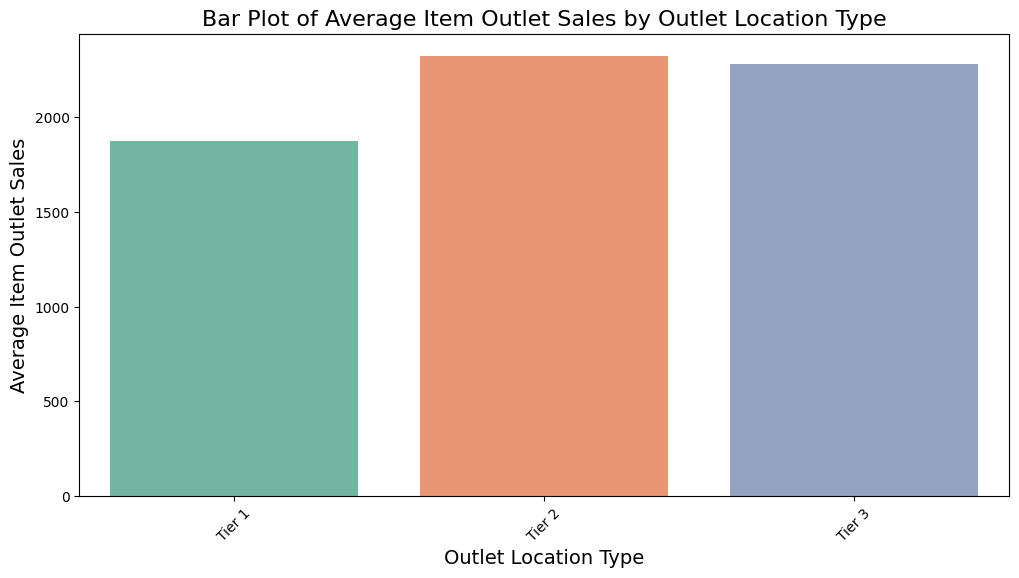

In [26]:
plt.figure(figsize=(12, 6))

# Calculate the mean sales for each outlet location type
mean_sales_location = data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index()

# Create the bar plot
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=mean_sales_location, palette='Set2')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Bar Plot of Average Item Outlet Sales by Outlet Location Type', fontsize=16)
plt.xlabel('Outlet Location Type', fontsize=14)
plt.ylabel('Average Item Outlet Sales', fontsize=14)
plt.show()

C:\Users\yanvi\AppData\Local\Temp\ipykernel_7320\1706210134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette='Set2')


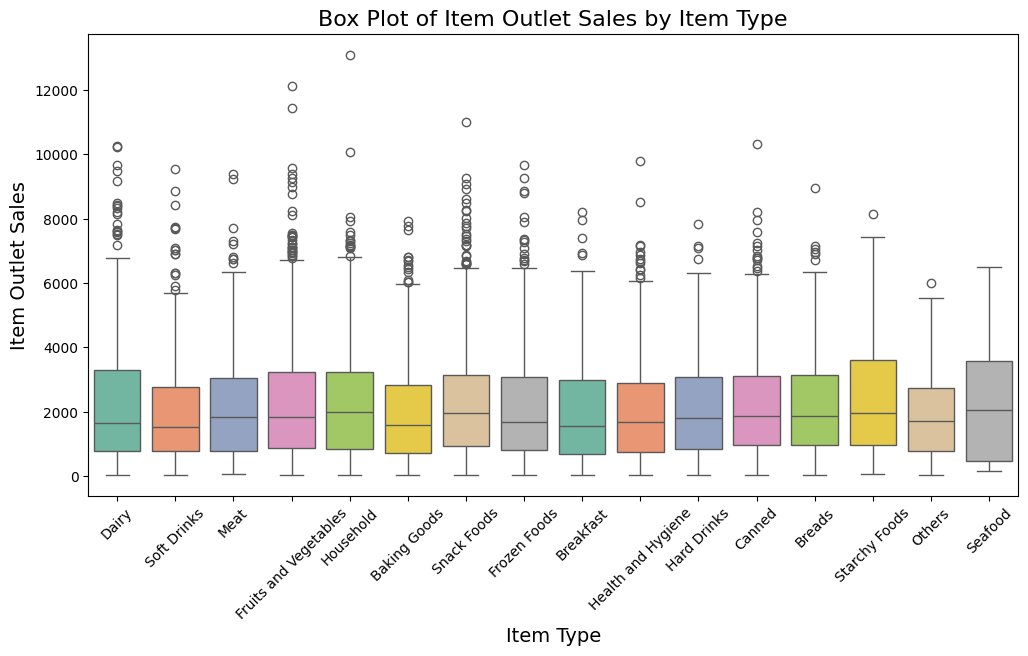

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.title('Box Plot of Item Outlet Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.show()


## Outliers

**Outliers** are data points that differ significantly from the rest of the dataset. They can occur due to variability in the data or may indicate measurement errors. Outliers are important for several reasons:

- **Impact on Analysis**: Outliers can skew statistical analyses, affecting measures such as the mean and standard deviation.
- **Insight into Data**: They may provide valuable insights into variability, trends, or anomalies within the dataset.
- **Identification**: Outliers can be identified using visualizations like boxplots and scatter plots or through statistical methods such as the Z-score or IQR method.
- **Handling Outliers**: Depending on the analysis context, outliers can be retained, removed, or treated using various techniques.

Understanding and addressing outliers is crucial for accurate data analysis and interpretation.


## Types of Outliers

Outliers can be categorized into several types based on their characteristics and the context in which they occur:

1. **Point Outliers**: 
   - Individual observations that lie far away from the majority of the data points.
   - Example: A single test score significantly higher or lower than the rest.

2. **Contextual Outliers**:
   - Data points that are considered outliers in a specific context but may not be outliers in another.
   - Example: A temperature reading of 100°F may be normal in summer but an outlier in winter.

3. **Collective Outliers**:
   - A group of observations that deviate significantly from the overall dataset. 
   - Example: A sudden spike in sales over a short period due to a marketing campaign.

4. **Univariate Outliers**:
   - Outliers that are identified based on a single variable.
   - Example: A value that is much higher or lower than the rest in a dataset of heights.

5. **Multivariate Outliers**:
   - Outliers that are identified based on the relationships between multiple variables.
   - Example: A data point that doesn't fit well within the expected distribution of two correlated variables.

Understanding the different types of outliers is crucial for effective data analysis and decision-making.


In [28]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


### Feature Engineering

Feature engineering is the process of transforming raw data into meaningful features that can improve the performance of machine learning models. It involves selecting, modifying, and creating new features to better represent the underlying patterns in the data.


In [29]:
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']


# Feature Encoding in Machine Learning

Feature encoding is the process of converting categorical data into numerical format to be used in machine learning algorithms. Since many algorithms only work with numerical input, feature encoding is essential when working with categorical variables.


In [30]:
!pip install category_encoders
import category_encoders as ce


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
# Target Encoding for Item_Type
item_type_encoder = ce.TargetEncoder(cols=['Item_Type'])
data['Item_Type'] = item_type_encoder.fit_transform(data['Item_Type'], data['Item_Outlet_Sales'])

# Frequency Encoding for Outlet_Identifier
frequency = data['Outlet_Identifier'].value_counts().to_dict()
data['Outlet_Identifier'] = data['Outlet_Identifier'].map(frequency)


# Outlier Detection in Data Analysis

Outliers are data points that deviate significantly from the majority and can distort analysis results.

## Types of Outliers
- **Univariate**: Outliers in a single variable.
- **Multivariate**: Outliers based on combinations of multiple variables.

## Causes
- Data entry or measurement errors.
- Natural variability or sampling issues.

## Detection Methods

1. **Statistical**:
   - **Z-Score**: Identifies data points far from the mean.
   - **IQR (Interquartile Range)**: Outliers fall outside 1.5 times the IQR.
   
2. **Machine Learning**:
   - **Isolation Forest**: Partitions data to isolate outliers.
   - **DBSCAN**: Labels sparse regions as outliers.
   
3. **Visualization**:
   - **Box Plot**: Shows outliers as points beyond whiskers.
   - **Scatter Plot**: Highlights unusual data points.

## Handling Outliers
- **Remove**: For errors or irrelevant data.
- **Transform**: Apply log or square root transformations.
- **Cap**: Limit extreme values.
- **Use robust models**: Algorithms like decision trees are less sensitive to outliers.




In [32]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Checking for outliers in numerical columns
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
outliers = {}

for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(data, col)
    print(f"Outliers detected in {col}: {len(outliers[col])}")

Outliers detected in Item_Weight: 0
Outliers detected in Item_Visibility: 144
Outliers detected in Item_MRP: 0
Outliers detected in Item_Outlet_Sales: 186


# Mitigation Strategy: Identify, address, and manage risks to minimize their impact on project goals.


In [33]:
# Function to cap outliers
import numpy as np
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Capping outliers for the numerical columns
for col in numerical_cols:
    cap_outliers(data, col)

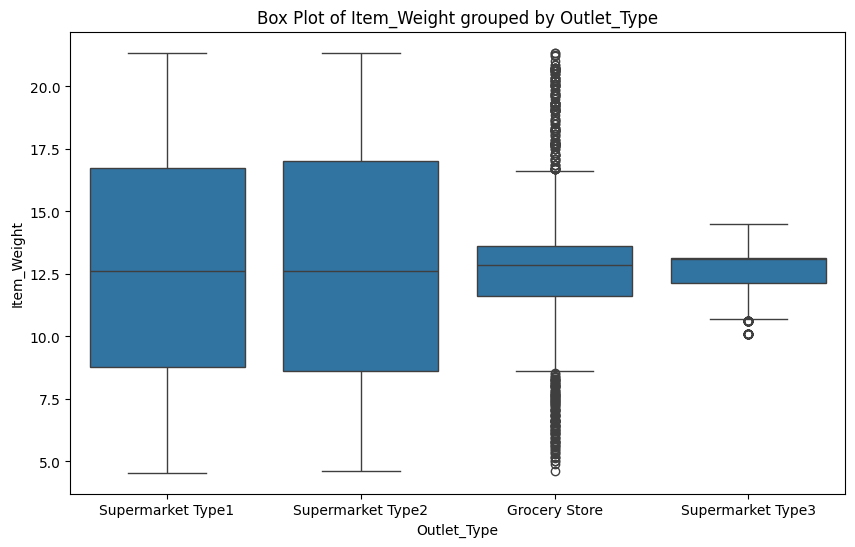

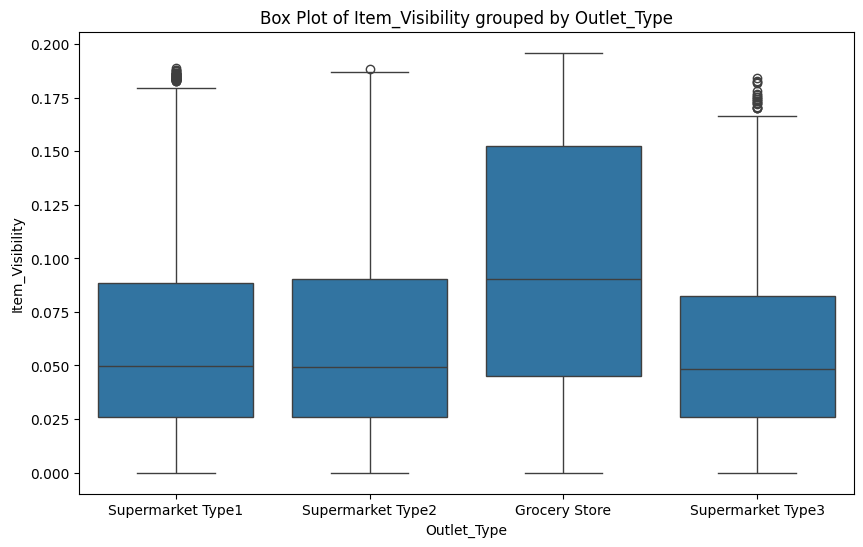

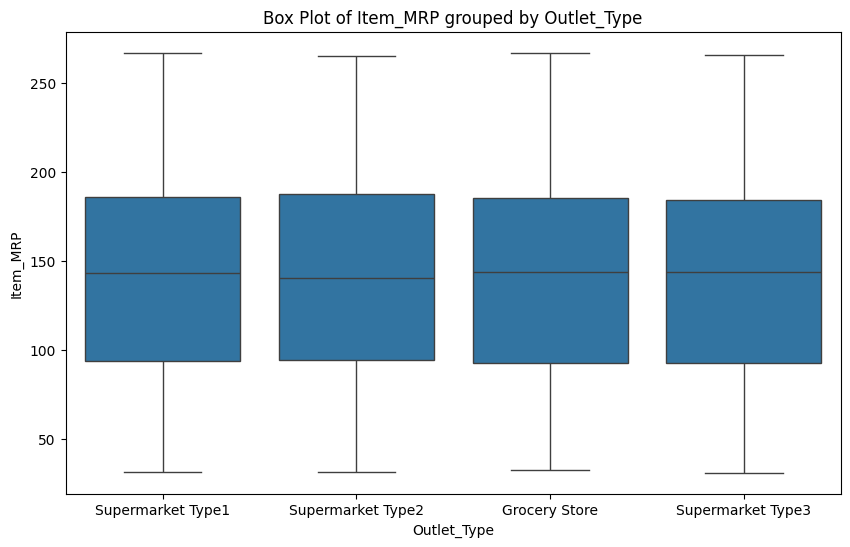

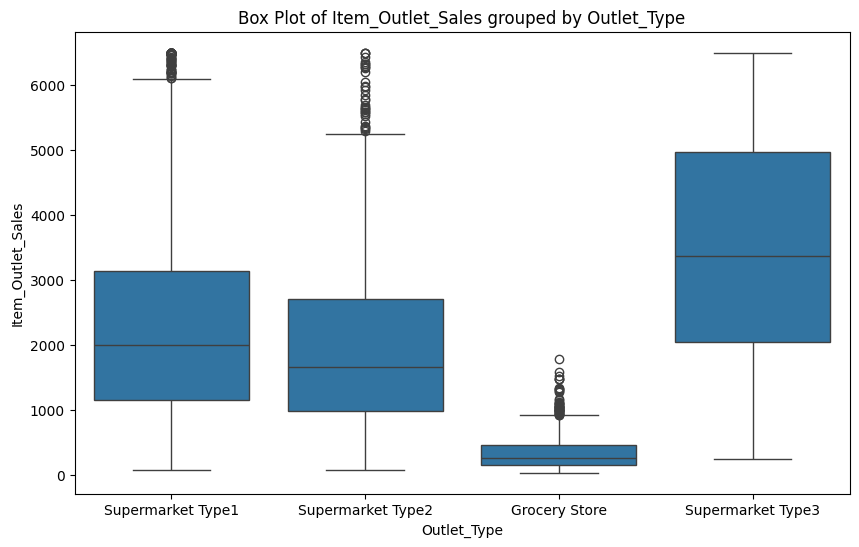

In [34]:
if 'Outlet_Type' in data.columns:
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Outlet_Type', y=col, data=data)
        plt.title(f'Box Plot of {col} grouped by Outlet_Type')
        plt.show()


In [35]:
# Mapping for Fat Content values
fat_content_mapping = {
    'low fat': 'low fat',
    'LF': 'low fat',
    'reg': 'regular',
    'Regular': 'regular',
    'Low Fat': 'low fat'
}

# Apply the mapping
data['Item_Fat_Content'] = data['Item_Fat_Content'].str.lower().str.strip().replace(fat_content_mapping)

# Check for unique values after mapping
unique_values = data['Item_Fat_Content'].unique()
print("Unique values in Item_Fat_Content after mapping:", unique_values)

# Check for unique values in Item_Fat_Content
print(data['Item_Fat_Content'].value_counts())

Unique values in Item_Fat_Content after mapping: ['low fat' 'regular' 'lf']
Item_Fat_Content
low fat    5201
regular    3006
lf          316
Name: count, dtype: int64


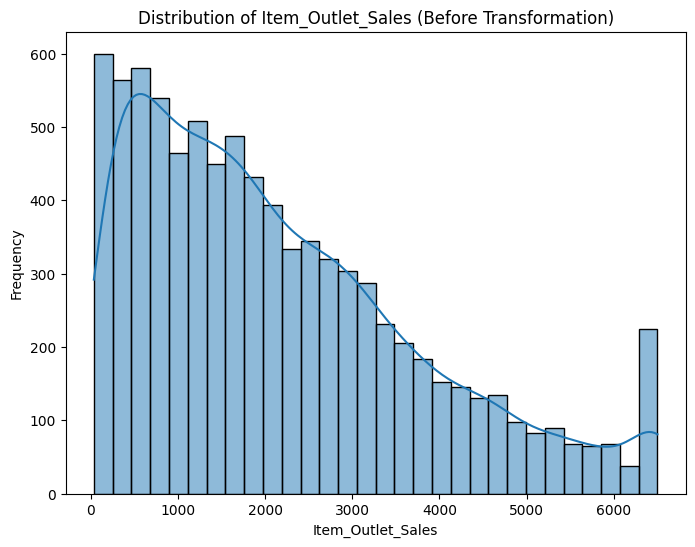

In [36]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item_Outlet_Sales (Before Transformation)')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()


In [37]:
from scipy.stats import skew

In [38]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check for skewness in numeric columns
skewness = numeric_data.skew()

In [39]:
print("Skewness of each numerical feature:")
print(skewness)

Skewness of each numerical feature:
Item_Weight                  0.118404
Item_Visibility              0.813980
Item_Type                   -0.813313
Item_MRP                     0.127202
Outlet_Identifier           -2.244651
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            0.874606
Outlet_Age                   0.396641
dtype: float64


In [40]:
def fix_skewness(data):
    for feature in data.columns:
        if abs(data[feature].skew()) > 1:  # Check for high skewness
            # Log transformation for right skewed data
            if data[feature].min() > 0:  # Log transformation only for positive values
                data[feature] = np.log1p(data[feature])
                print(f"Applied log transformation on {feature}")
            else:
                # Box-Cox transformation for non-positive values
                data[feature], _ = boxcox1p(data[feature], 0.5)  # Add a constant if there are zero or negative values
                print(f"Applied Box-Cox transformation on {feature}")
    
    return data

In [41]:
fixed_data = fix_skewness(numeric_data)

# Check the skewness after transformation
new_skewness = fixed_data.skew()
print("\nSkewness after transformation:")
print(new_skewness)

Applied log transformation on Outlet_Identifier

Skewness after transformation:
Item_Weight                  0.118404
Item_Visibility              0.813980
Item_Type                   -0.813313
Item_MRP                     0.127202
Outlet_Identifier           -2.249955
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            0.874606
Outlet_Age                   0.396641
dtype: float64


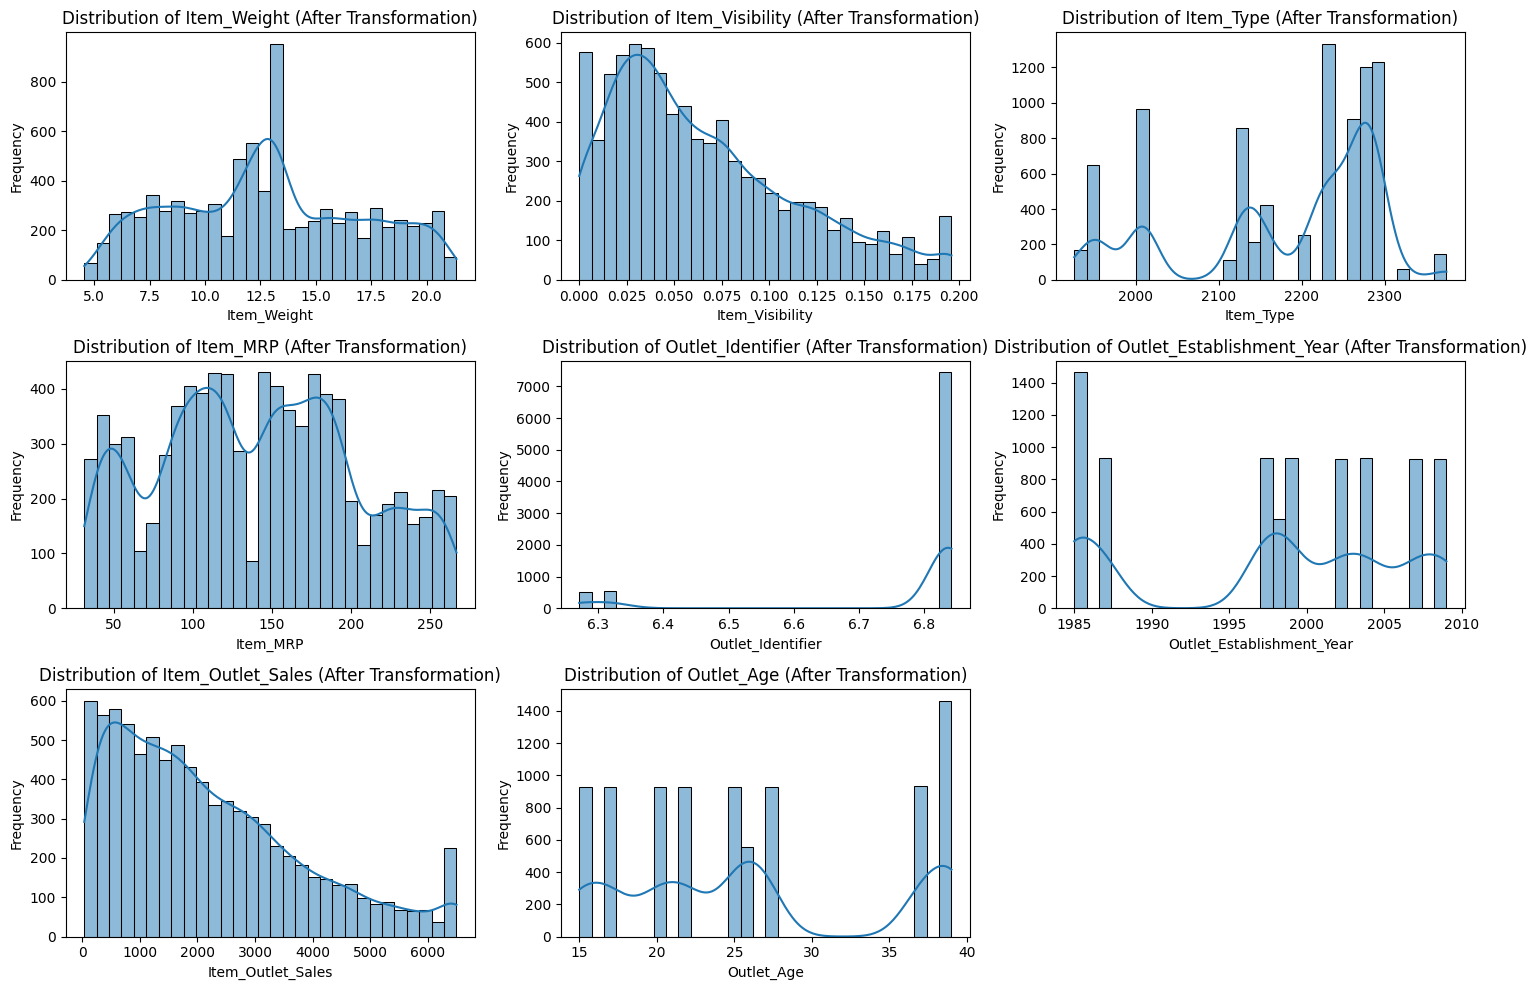

In [42]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(fixed_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(fixed_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} (After Transformation)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

print(data.dtypes)


categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string and encode
    label_encoders[col] = le  # Store the label encoder for future use
    print(f"Encoded {col} with LabelEncoder")

# Now, apply Box-Cox transformation on Outlet_Identifier or other numeric features
from scipy.stats import boxcox

# Check for minimum value
if data['Outlet_Identifier'].min() <= 0:
    # Create a shifted version of the data if necessary
    data['Outlet_Identifier'] = data['Outlet_Identifier'] + abs(data['Outlet_Identifier'].min()) + 1

# Apply Box-Cox transformation
data['Outlet_Identifier'], _ = boxcox(data['Outlet_Identifier'])

# Check skewness after Box-Cox transformation
new_skewness = data.skew()
print("\nSkewness after Box-Cox transformation on Outlet_Identifier:")
print(new_skewness)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
dtype: object
Categorical columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Encoded Item_Identifier with LabelEncoder
Encoded Item_Fat_Content with LabelEncoder
Encoded Outlet_Size with LabelEncoder
Encoded Outlet_Location_Type with LabelEncoder
Encoded Outlet_Type with LabelEncoder

Skewness after Box-Cox transformation on Outlet_Identifier:
Item_Identifier             -0.008877
Item_Weight                  0.118404
Item_Fat_

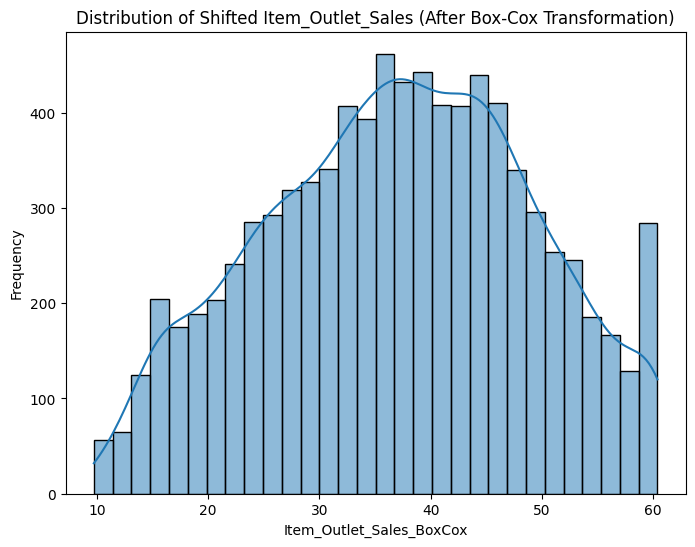

   Item_Outlet_Sales  Item_Outlet_Sales_Shifted  Item_Outlet_Sales_BoxCox
0          3735.1380                  3769.4280                 49.204683
1           443.4228                   477.7128                 22.232150
2          2097.2700                  2131.5600                 39.703586
3           732.3800                   766.6700                 26.796059
4           994.7052                  1028.9952                 30.045575


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Load your dataset
# data = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Step 1: Shift the data by adding a constant (for negative values)
min_value = abs(data['Item_Outlet_Sales'].min()) + 1
data['Item_Outlet_Sales_Shifted'] = data['Item_Outlet_Sales'] + min_value

# Step 2: Apply Box-Cox transformation
data['Item_Outlet_Sales_BoxCox'], _ = boxcox(data['Item_Outlet_Sales_Shifted'])

# Step 3: Plot the distribution after Box-Cox transformation
plt.figure(figsize=(8, 6))
sns.histplot(data['Item_Outlet_Sales_BoxCox'], kde=True)
plt.title('Distribution of Shifted Item_Outlet_Sales (After Box-Cox Transformation)')
plt.xlabel('Item_Outlet_Sales_BoxCox')
plt.ylabel('Frequency')
plt.show()

# Step 4: Display transformed data
print(data[['Item_Outlet_Sales', 'Item_Outlet_Sales_Shifted', 'Item_Outlet_Sales_BoxCox']].head())


In [45]:
# Display the entire numeric dataset
numeric_data = data.select_dtypes(include=[np.number])
print(numeric_data)


      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

        Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0     2232.542597  249.8092       2.164648e+41

# Data Processing Steps Summary

1. **Import Libraries**: Imported necessary libraries such as `pandas`, `numpy`, `seaborn`, `matplotlib`, and `scipy.stats`.

2. **Load Dataset**: Loaded the dataset into a DataFrame named `data`.

3. **Check for Missing Values**: Checked for NaN values in the `Item_Outlet_Sales` column.

4. **Handle Missing Values**: Filled NaN values in `Item_Outlet_Sales` with the median.

5. **Shift Data for Box-Cox Transformation**: Added a constant to `Item_Outlet_Sales` to create `Item_Outlet_Sales_Shifted`, ensuring all values are positive.

6. **Apply Box-Cox Transformation**: Applied the Box-Cox transformation on `Item_Outlet_Sales_Shifted` and stored the results in `Item_Outlet_Sales_BoxCox`.

7. **Visualize Distribution**: Plotted the distribution of `Item_Outlet_Sales_BoxCox` using a histogram with a KDE overlay.

8. **Display Transformed Data**: Printed the first few rows of the original, shifted, and transformed columns.

9. **Extract Numeric Dataset**: Extracted and displayed the entire numeric dataset from the DataFrame.

10. **Check Data Characteristics**: Evaluated whether having 8,523 rows is appropriate for the dataset's characteristics.


In [46]:
numeric_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Outlet_Sales_Shifted,Item_Outlet_Sales_BoxCox
0,156,9.300,1,0.016047,2232.542597,249.8092,2.164648e+41,1999,1,0,1,3735.1380,25,3769.4280,49.204683
1,8,5.920,2,0.019278,2006.511735,48.2692,2.098959e+41,2009,1,2,2,443.4228,15,477.7128,22.232150
2,662,17.500,1,0.016760,2158.977911,141.6180,2.164648e+41,1999,1,0,1,2097.2700,25,2131.5600,39.703586
3,1121,19.200,2,0.000000,2289.009592,182.0950,1.337551e+38,1998,2,2,0,732.3800,26,766.6700,26.796059
4,1297,8.930,1,0.000000,2258.784300,53.8614,2.232245e+41,1987,0,2,1,994.7052,37,1028.9952,30.045575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,2277.321739,214.5218,2.232245e+41,1987,0,2,1,2778.3834,37,2812.6734,44.086051
8519,897,8.380,2,0.046982,1952.971207,108.1570,2.131568e+41,2002,2,1,1,549.2850,22,583.5750,24.070564
8520,1357,10.600,1,0.035186,2010.000265,85.1224,2.164648e+41,2004,2,1,1,1193.1136,20,1227.4036,32.160869
8521,681,7.210,2,0.145221,2277.321739,103.1332,2.098959e+41,2009,1,2,2,1845.5976,15,1879.8876,37.854960


#### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is between -1 and 1.

Positive correlation: Indicates that as one variable increases, the other tends to increase.
Negative correlation: Indicates that as one variable increases, the other tends to decrease.
Zero correlation: Suggests no linear relationship between the variables.


                           Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.051097         -0.108857   
Item_Weight                       0.051097     1.000000         -0.017918   
Item_Fat_Content                 -0.108857    -0.017918          1.000000   
Item_Visibility                  -0.026757    -0.012788          0.045226   
Item_Type                        -0.027605     0.059344          0.088349   
Item_MRP                          0.012853     0.026537          0.007815   
Outlet_Identifier                -0.014914     0.002715          0.005362   
Outlet_Establishment_Year        -0.012772     0.007724          0.001933   
Outlet_Size                       0.001229    -0.012110         -0.002288   
Outlet_Location_Type              0.003656     0.001062         -0.006063   
Outlet_Type                      -0.001178    -0.011305         -0.000077   
Item_Outlet_Sales                 0.003056     0.011033          0.021198   

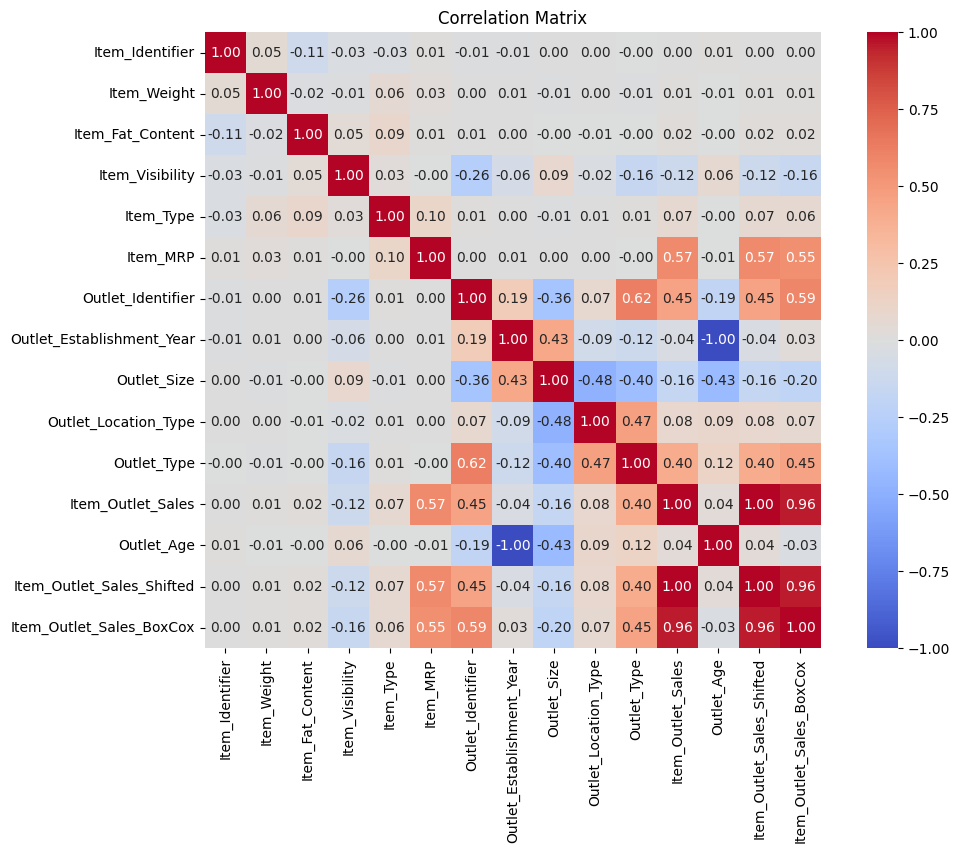

In [59]:
correlation_matrix = data.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix")
plt.show()

### The strongest relationships are found in sales-related features (Item_Outlet_Sales with Item_Outlet_Sales_Shifted and Item_Outlet_Sales_BoxCox).
Outlet_Identifier has a moderate correlation with Outlet_Type, indicating that specific outlets have certain types.
Item_MRP is moderately positively correlated with sales, suggesting higher-priced items tend to generate more sales.

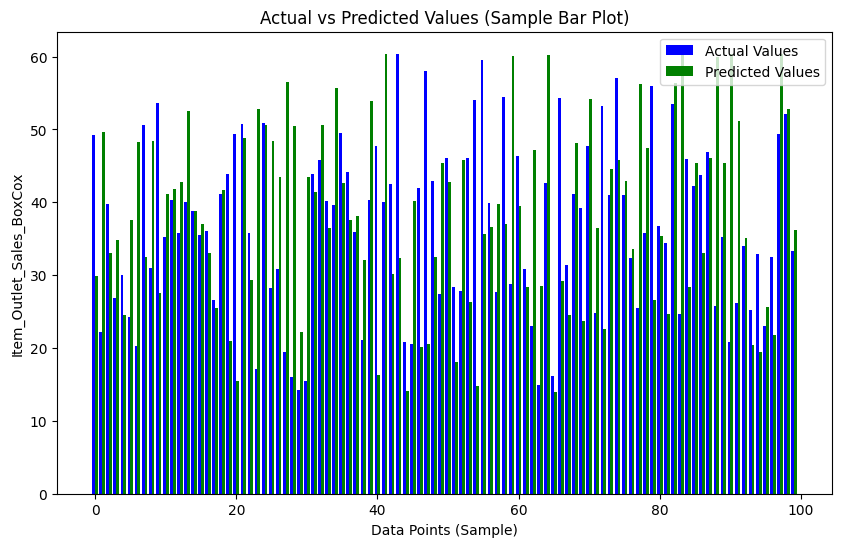

In [62]:
# Step 1: Take a sample of the data (e.g., first 100 data points)
sample_size = 100  # Adjust the sample size as needed
sample_actual = actual_values[:sample_size]
sample_predicted = predicted_values[:sample_size]

# Step 2: Plot a bar graph for the sample
plt.figure(figsize=(10, 6))

# X-axis positions for the bars
x_axis = np.arange(len(sample_actual))

# Plotting actual vs predicted values for the sample
plt.bar(x_axis - 0.2, sample_actual, width=0.4, label='Actual Values', color='blue')
plt.bar(x_axis + 0.2, sample_predicted, width=0.4, label='Predicted Values', color='green')

# Adding labels and title
plt.xlabel('Data Points (Sample)')
plt.ylabel('Item_Outlet_Sales_BoxCox')
plt.title('Actual vs Predicted Values (Sample Bar Plot)')

# Set a fixed location for the legend
plt.legend(loc='upper right')

# Display the plot
plt.show()


In [47]:
print(data.dtypes)

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Outlet_Sales_Shifted    float64
Item_Outlet_Sales_BoxCox     float64
dtype: object


In [54]:
y = data['Item_Outlet_Sales_BoxCox']
X = data.drop(columns=["Item_Outlet_Sales", "Item_Outlet_Sales_BoxCox", "Item_Outlet_Sales_Shifted"])  # Drop original, shifted, and Box-Cox columns


In [55]:
from sklearn.model_selection import train_test_split

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.preprocessing import StandardScaler

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
